In [1]:
import evaluation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
evaluation_data = evaluation.evaluate_all()

In [ ]:
df = pd.DataFrame(evaluation_data)

In [158]:
datasets = ['aldwell', 'kostka-payne', 'reger', 'rimsky-korsakov', 'tchaikovsky', 'all_files']
evaluation_metrics = ['slice_based', 'duration_based']
models = ['random_guess', 'globalkey_guess', 'perfect_modulation', 'perfect_tonicization', 'justkeydding']

dataset_rows = []
evaluation_rows = []
model_rows = []
modulation_score_rows = []
tonicization_score_rows = []
for dataset in datasets:
    for evaluation in evaluation_metrics:
        for model in models:
            # Make a query for given parameters in modulation task
            mod = pd.DataFrame(df[
                (df.dataset == dataset) &      
                (df.evaluation == evaluation) &
                (df.model == model) &
                (df.task == 'modulation')
            ])
            mod.set_index('file', inplace=True)
            mod.rename(columns={'mirex_score': 'modulation_score'}, inplace=True)
            mod.drop(columns=['task'], inplace=True)
            # Make a query for given parameters in tonicization task
            ton = pd.DataFrame(df[
                (df.dataset == dataset) &      
                (df.evaluation == evaluation) &
                (df.model == model) &
                (df.task == 'tonicization')
            ])
            ton.set_index('file', inplace=True)
            ton.rename(columns={'mirex_score': 'tonicization_score'}, inplace=True)
            ton.drop(columns=['task'], inplace=True)
            # Put the tonicization score in the first dataframe
            mod['tonicization_score'] = ton['tonicization_score']
            # Compute additional statistics            
            dataset_rows.append(dataset)
            evaluation_rows.append(evaluation)
            model_rows.append(model)
            modulation_score_rows.append(mod.modulation_score.mean())
            tonicization_score_rows.append(mod.tonicization_score.mean())        
df_dict = {
    'dataset': dataset_rows,
    'evaluation': evaluation_rows,
    'model': model_rows,
    'modulation_mean': modulation_score_rows,
    'tonicization_mean': tonicization_score_rows
}
df = pd.DataFrame(df_dict)
df = df[df.evaluation == 'duration_based']
# print(pd.DataFrame(df_dict))

In [159]:
df = pd.melt(
    df, 
    id_vars=['dataset', 'model'], 
    value_vars=['modulation_mean', 'tonicization_mean'], 
    var_name='task',
    value_name='mirex_mean_score'
)
df

,dataset,model,task,mirex_mean_score
0,aldwell,random_guess,modulation_mean,0.078232
1,aldwell,globalkey_guess,modulation_mean,0.724743
2,aldwell,perfect_modulation,modulation_mean,1.000000
3,aldwell,perfect_tonicization,modulation_mean,0.989815
4,aldwell,justkeydding,modulation_mean,0.880599
5,kostka-payne,random_guess,modulation_mean,0.092312
6,kostka-payne,globalkey_guess,modulation_mean,0.589846
7,kostka-payne,perfect_modulation,modulation_mean,1.000000
8,kostka-payne,perfect_tonicization,modulation_mean,0.982837
9,kostka-payne,justkeydding,modulation_mean,0.709931


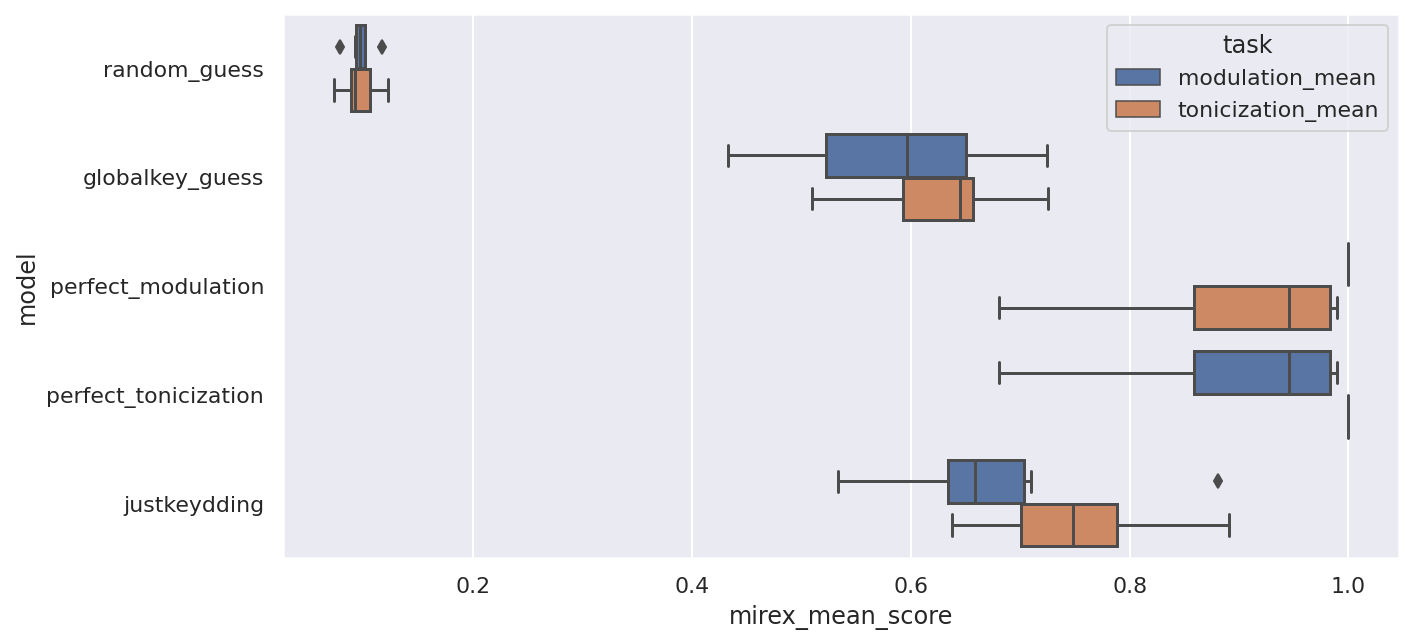

In [167]:
sns.set()
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, y='model', x='mirex_mean_score', hue='task')